In [2]:
import numpy as np
from sympy import symbols, Matrix, simplify
import matplotlib.pyplot as plt
from pyscf import gto, scf
from scipy.linalg import fractional_matrix_power
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')
import plottingsystem as pts

In [3]:
HexdieneN = """
  N   -0.0000000    0.1793693   -3.0005718
  C    0.0000000   -0.3886730   -1.8505137
  C   -0.0000000    0.4475141   -0.6043423
  C   -0.0000000   -0.4288567    0.6521929
  C   -0.0000000    0.4107928    1.9004961
  C   -0.0000000   -0.1574550    3.1085877
  H    0.0000000   -0.3834740   -3.8634778
  H    0.0000000   -1.4743844   -1.7881452
  H   -0.9052350    1.0934728   -0.6057469
  H    0.9052350    1.0934728   -0.6057469
  H    0.9055171   -1.0750046    0.6512472
  H   -0.9055171   -1.0750046    0.6512472
  H   -0.0000000    1.4955470    1.8313239
  H    0.0000000   -1.2379796    3.2173164
  H   -0.0000000    0.4611443    4.0001950
  """

In [4]:
extra_bounds = [(0,1)]
coordinates = pts.taking_x_and_y_coordinate(pts.taking_carbon_coordinates(HexdieneN))
print(coordinates)


HextrieneN_molecule = gto.M(atom=HexdieneN, basis='sto-3g')#'sto-6g''ccpvdz'

pz_indices = pts.taking_indices(HextrieneN_molecule, ['C 2px', 'N 2px'])
print(pz_indices)
hf = scf.RHF(HextrieneN_molecule)
hf_energy = hf.kernel()

[[-3.0005718  0.1793693]
 [-1.8505137 -0.388673 ]
 [-0.6043423  0.4475141]
 [ 0.6521929 -0.4288567]
 [ 1.9004961  0.4107928]
 [ 3.1085877 -0.157455 ]]
[2, 7, 12, 17, 22, 27]
converged SCF energy = -245.90854675773


In [5]:
mo_coeff = hf.mo_coeff.round(6)
mo_coeff = pts.normaliseer(mo_coeff)

In [6]:
mo_eigenvalues = hf.mo_energy[[13,17,20,22,23,24,28,34]]
print(mo_eigenvalues)
pz_AO_MO = mo_coeff[pz_indices][:, [13,17,20,22,23,24,28,34]]
print(pz_AO_MO)

[-0.59769841 -0.48734322 -0.35214938 -0.30552097  0.2983764   0.3178143
  0.63987439  0.78402924]
[[ 0.09380338 -0.17458046  0.69268797 -0.00353961 -0.64465601 -0.18596616
   0.05616763 -0.0513355 ]
 [ 0.16658313 -0.23511998  0.61363748 -0.00414776  0.66508484  0.20257937
  -0.10553061  0.11597534]
 [ 0.50969025 -0.4315921  -0.21022513  0.02355341  0.07131427  0.00518388
   0.45405587 -0.507236  ]
 [ 0.50160173  0.45191508  0.03738556 -0.1631674  -0.04043048  0.07635653
   0.45389604  0.50807173]
 [ 0.13856725  0.18213758  0.0330933   0.64836816 -0.18874544  0.65650325
  -0.11109386 -0.11984581]
 [ 0.06733482  0.11500915  0.03163782  0.68939564  0.19954668 -0.65114632
   0.0614725   0.05417949]]


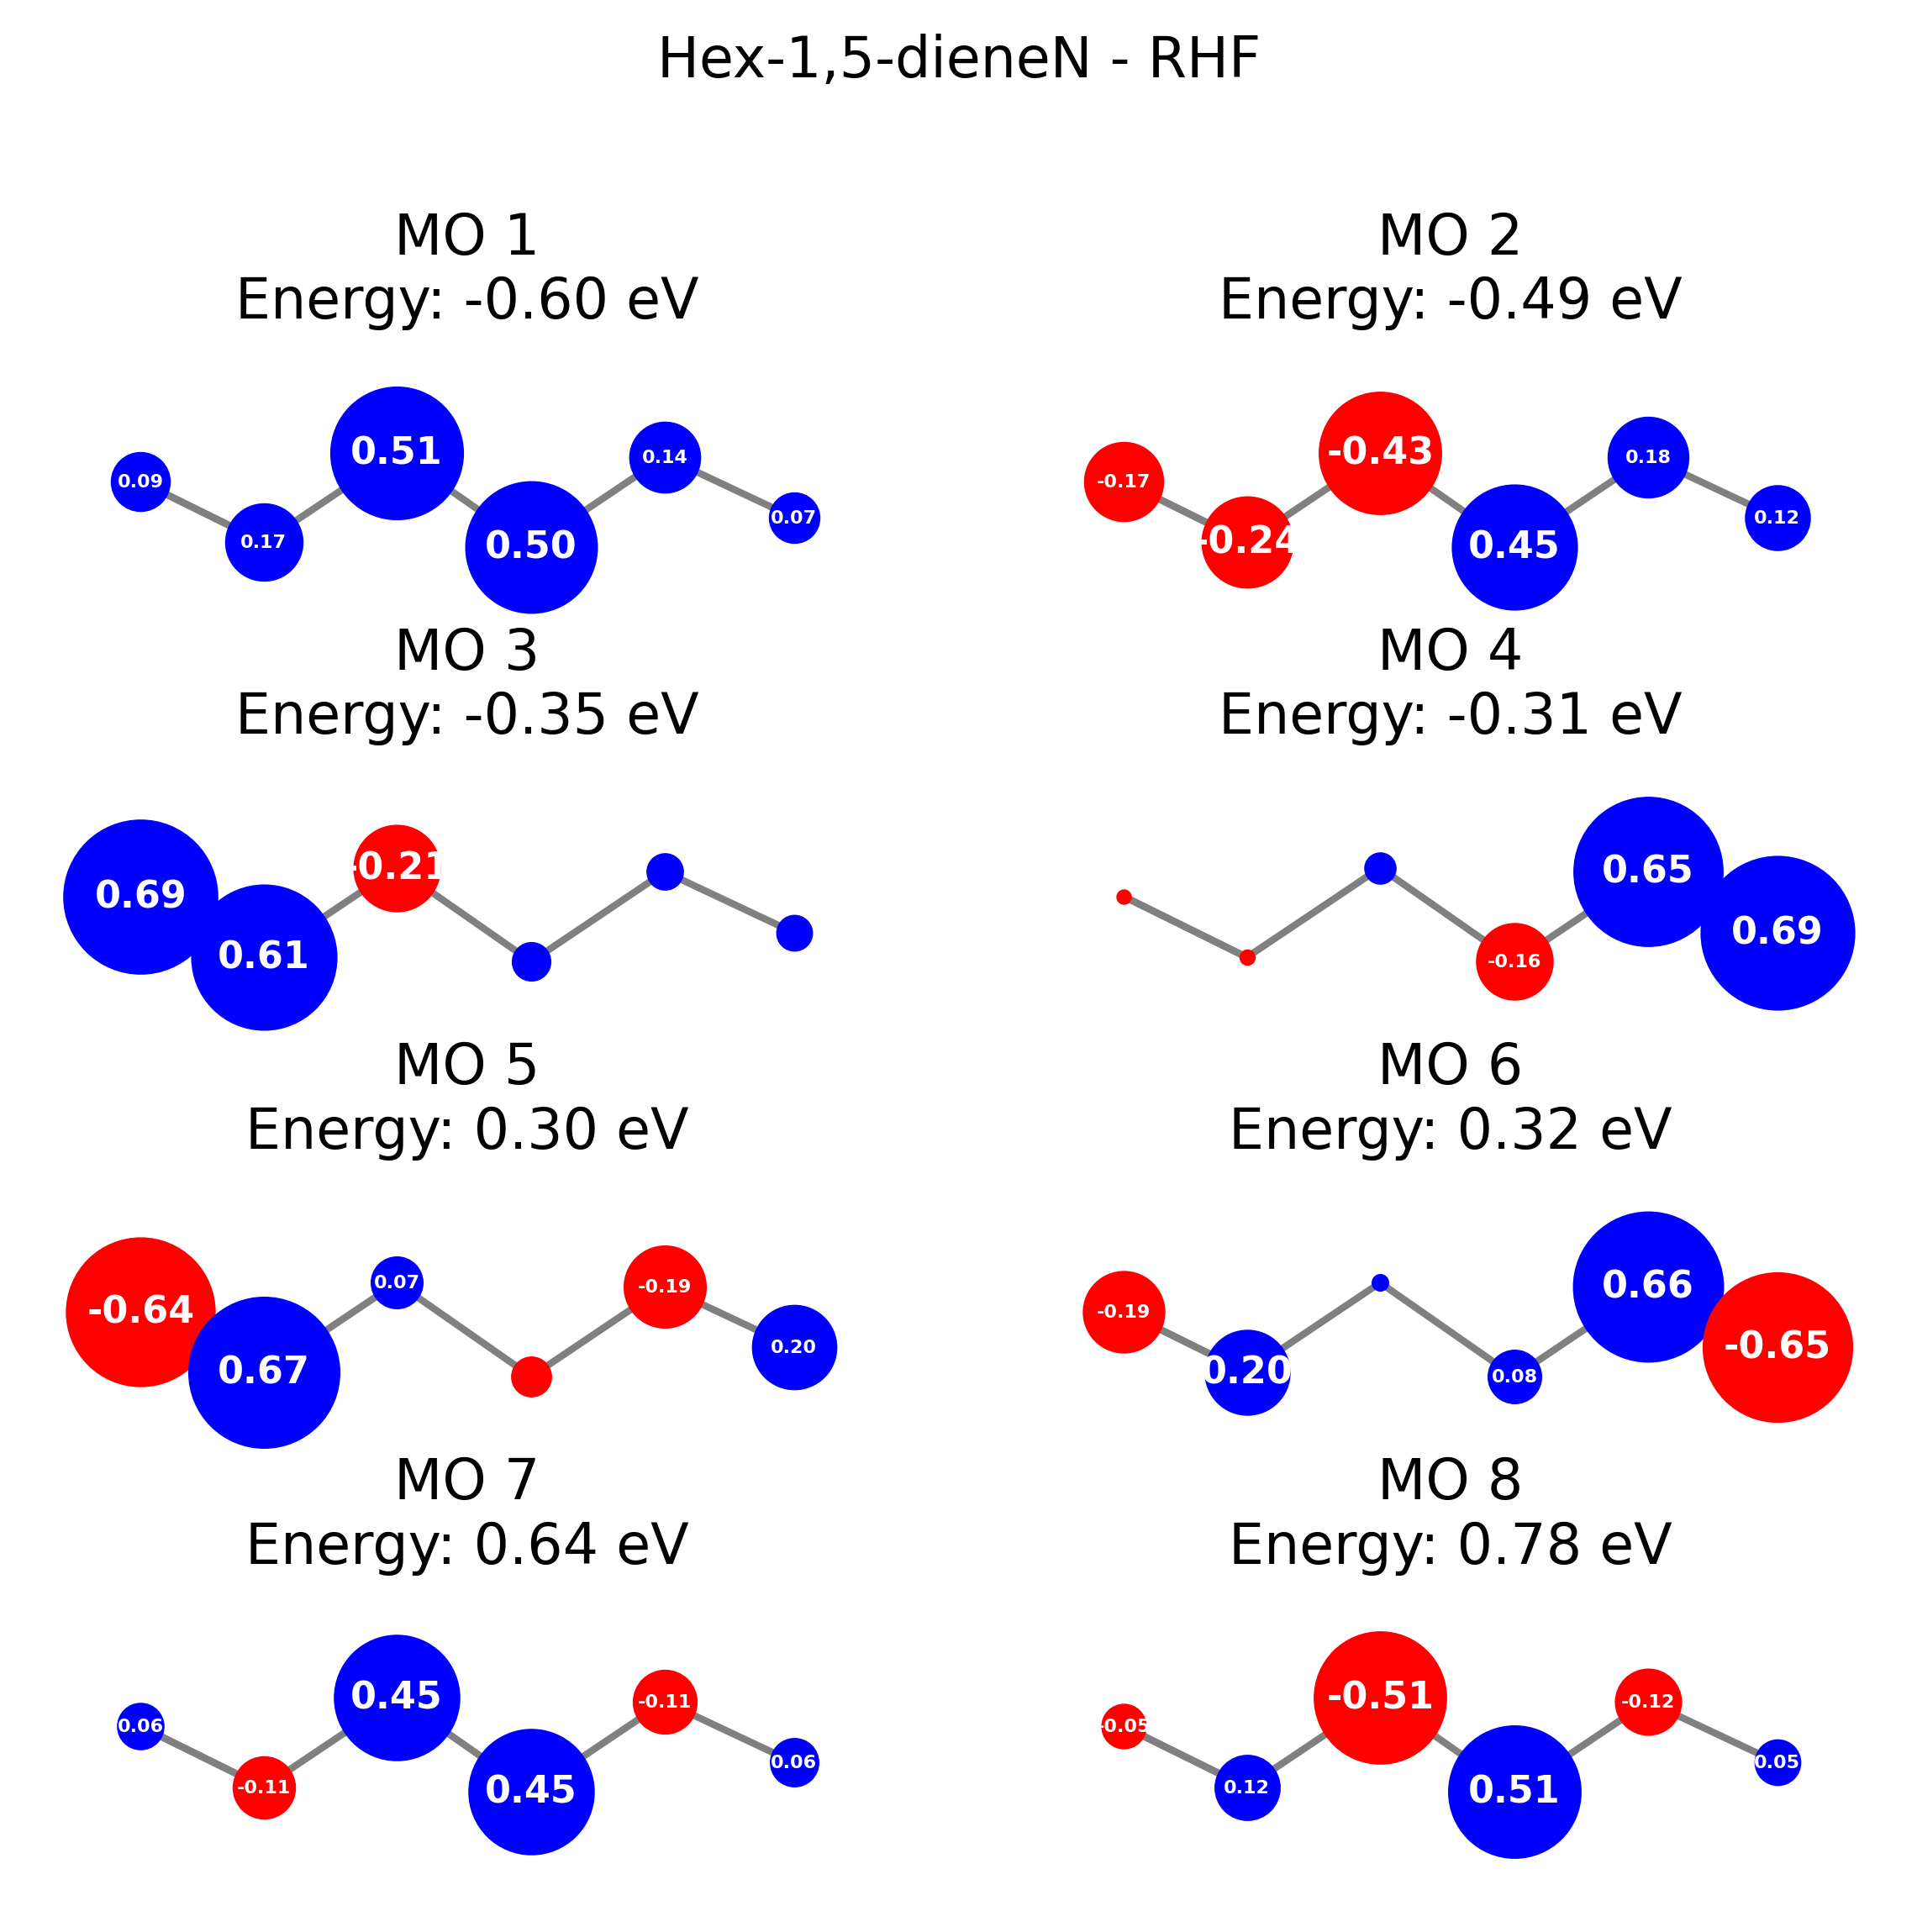

In [7]:
pts.plot_MOs(mo_eigenvalues, pz_AO_MO, coordinates, extra_bounds, 'Hex-1,5-dieneN', 'RHF', fig_size = (6,6))

In [8]:
D_rhf = pts.making_D(pz_AO_MO, 8)
print(D_rhf)

[[ 1.03821312e+00  9.63494790e-01 -4.50911336e-02 -1.07390527e-02
   3.65754775e-03  1.14256597e-02]
 [ 9.63494790e-01  9.19199010e-01  1.14564026e-01  1.84416161e-03
  -4.24641144e-03  1.46120037e-03]
 [-4.50911336e-02  1.14564026e-01  9.81610516e-01  9.78319937e-02
   6.62958290e-04 -1.14611644e-02]
 [-1.07390527e-02  1.84416161e-03  9.78319937e-02  9.67705618e-01
   9.45219161e-02 -5.11089267e-02]
 [ 3.65754775e-03 -4.24641144e-03  6.62958290e-04  9.45219161e-02
   9.47702832e-01  9.56614139e-01]
 [ 1.14256597e-02  1.46120037e-03 -1.14611644e-02 -5.11089267e-02
   9.56614139e-01  9.88056763e-01]]


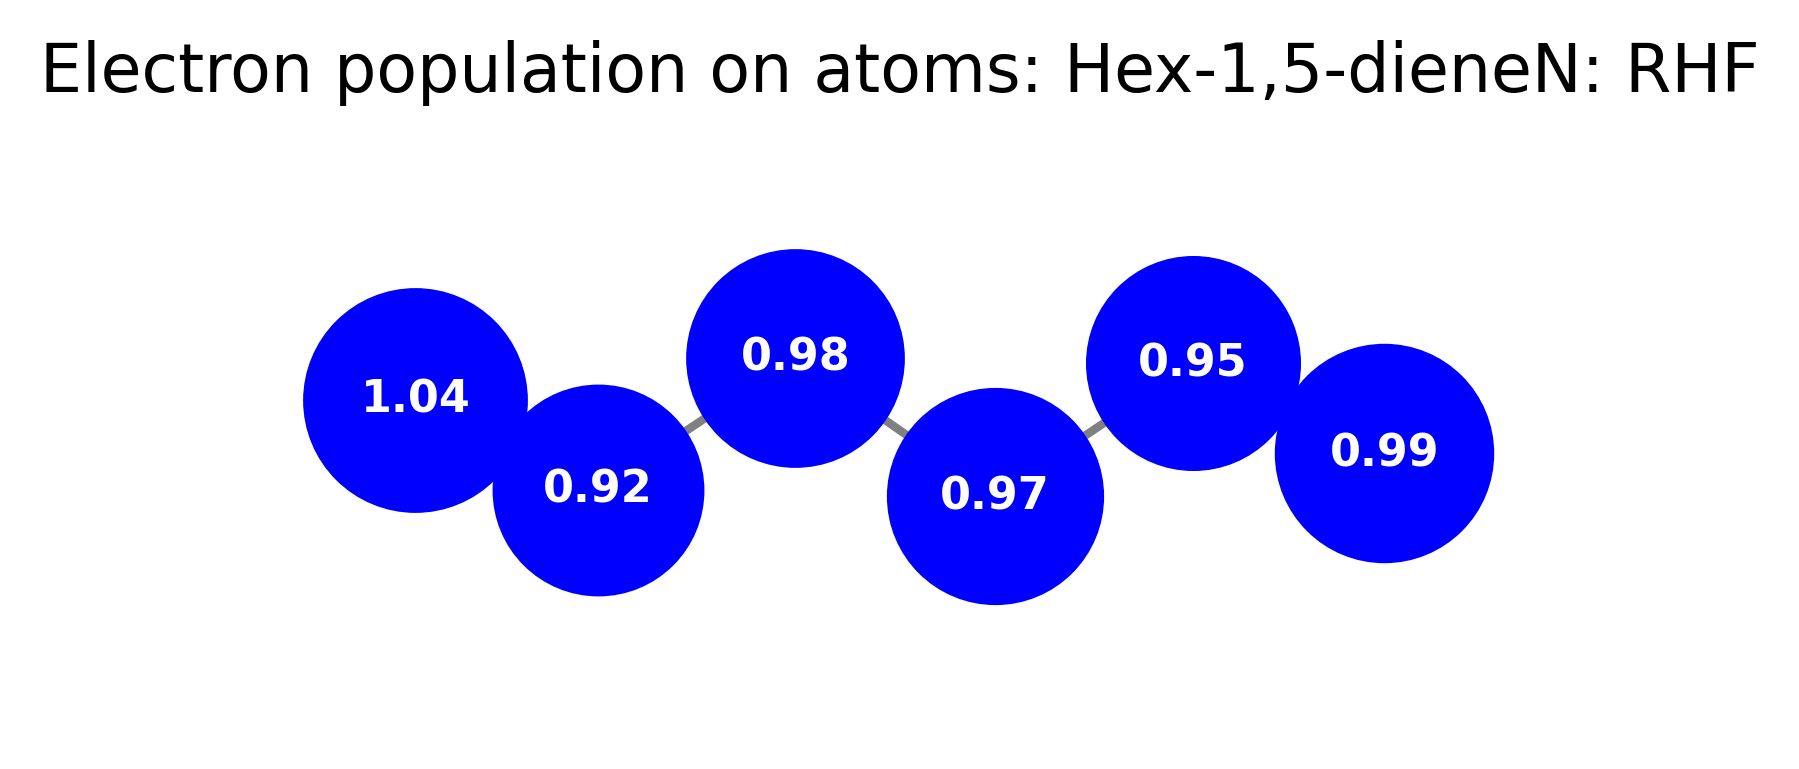

In [9]:
pts.plotting_of_D_atoms(6, coordinates, extra_bounds, D_rhf, 'Hex-1,5-dieneN', 'RHF',(5,2))

In [10]:
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel
N = -0.1
NC = -0.3
HexdieneN_huckel = huckel(6, -0.06, -0.08, 'lin')
HexdieneN_huckel.create_matrix()
for r, k in [(0,1)]:
    HexdieneN_huckel.huckel_matrix[r][k] = NC
    HexdieneN_huckel.huckel_matrix[k][r] = NC
HexdieneN_huckel.huckel_matrix[0][0] = N
HexdieneN_huckel.huckel_matrix[2][2] = 0
HexdieneN_huckel.huckel_matrix[3][3] = 0
for r, k in [(1,2),(2,3),(3,4)]:
    HexdieneN_huckel.huckel_matrix[r][k] = 0
    HexdieneN_huckel.huckel_matrix[k][r] = 0
huc_mat = HexdieneN_huckel.huckel_matrix
print(huc_mat)

[[-0.1  -0.3   0.    0.    0.    0.  ]
 [-0.3  -0.06  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -0.06 -0.08]
 [ 0.    0.    0.    0.   -0.08 -0.06]]


[-0.380666 -0.14      0.        0.        0.02      0.220666]
[[-0.730246  0.        0.        0.        0.        0.683184]
 [-0.683184  0.       -0.        0.        0.       -0.730246]
 [ 0.        0.       -1.       -0.        0.        0.      ]
 [ 0.        0.       -0.       -1.        0.        0.      ]
 [ 0.        0.707107 -0.       -0.        0.707107  0.      ]
 [ 0.        0.707107 -0.       -0.       -0.707107  0.      ]]


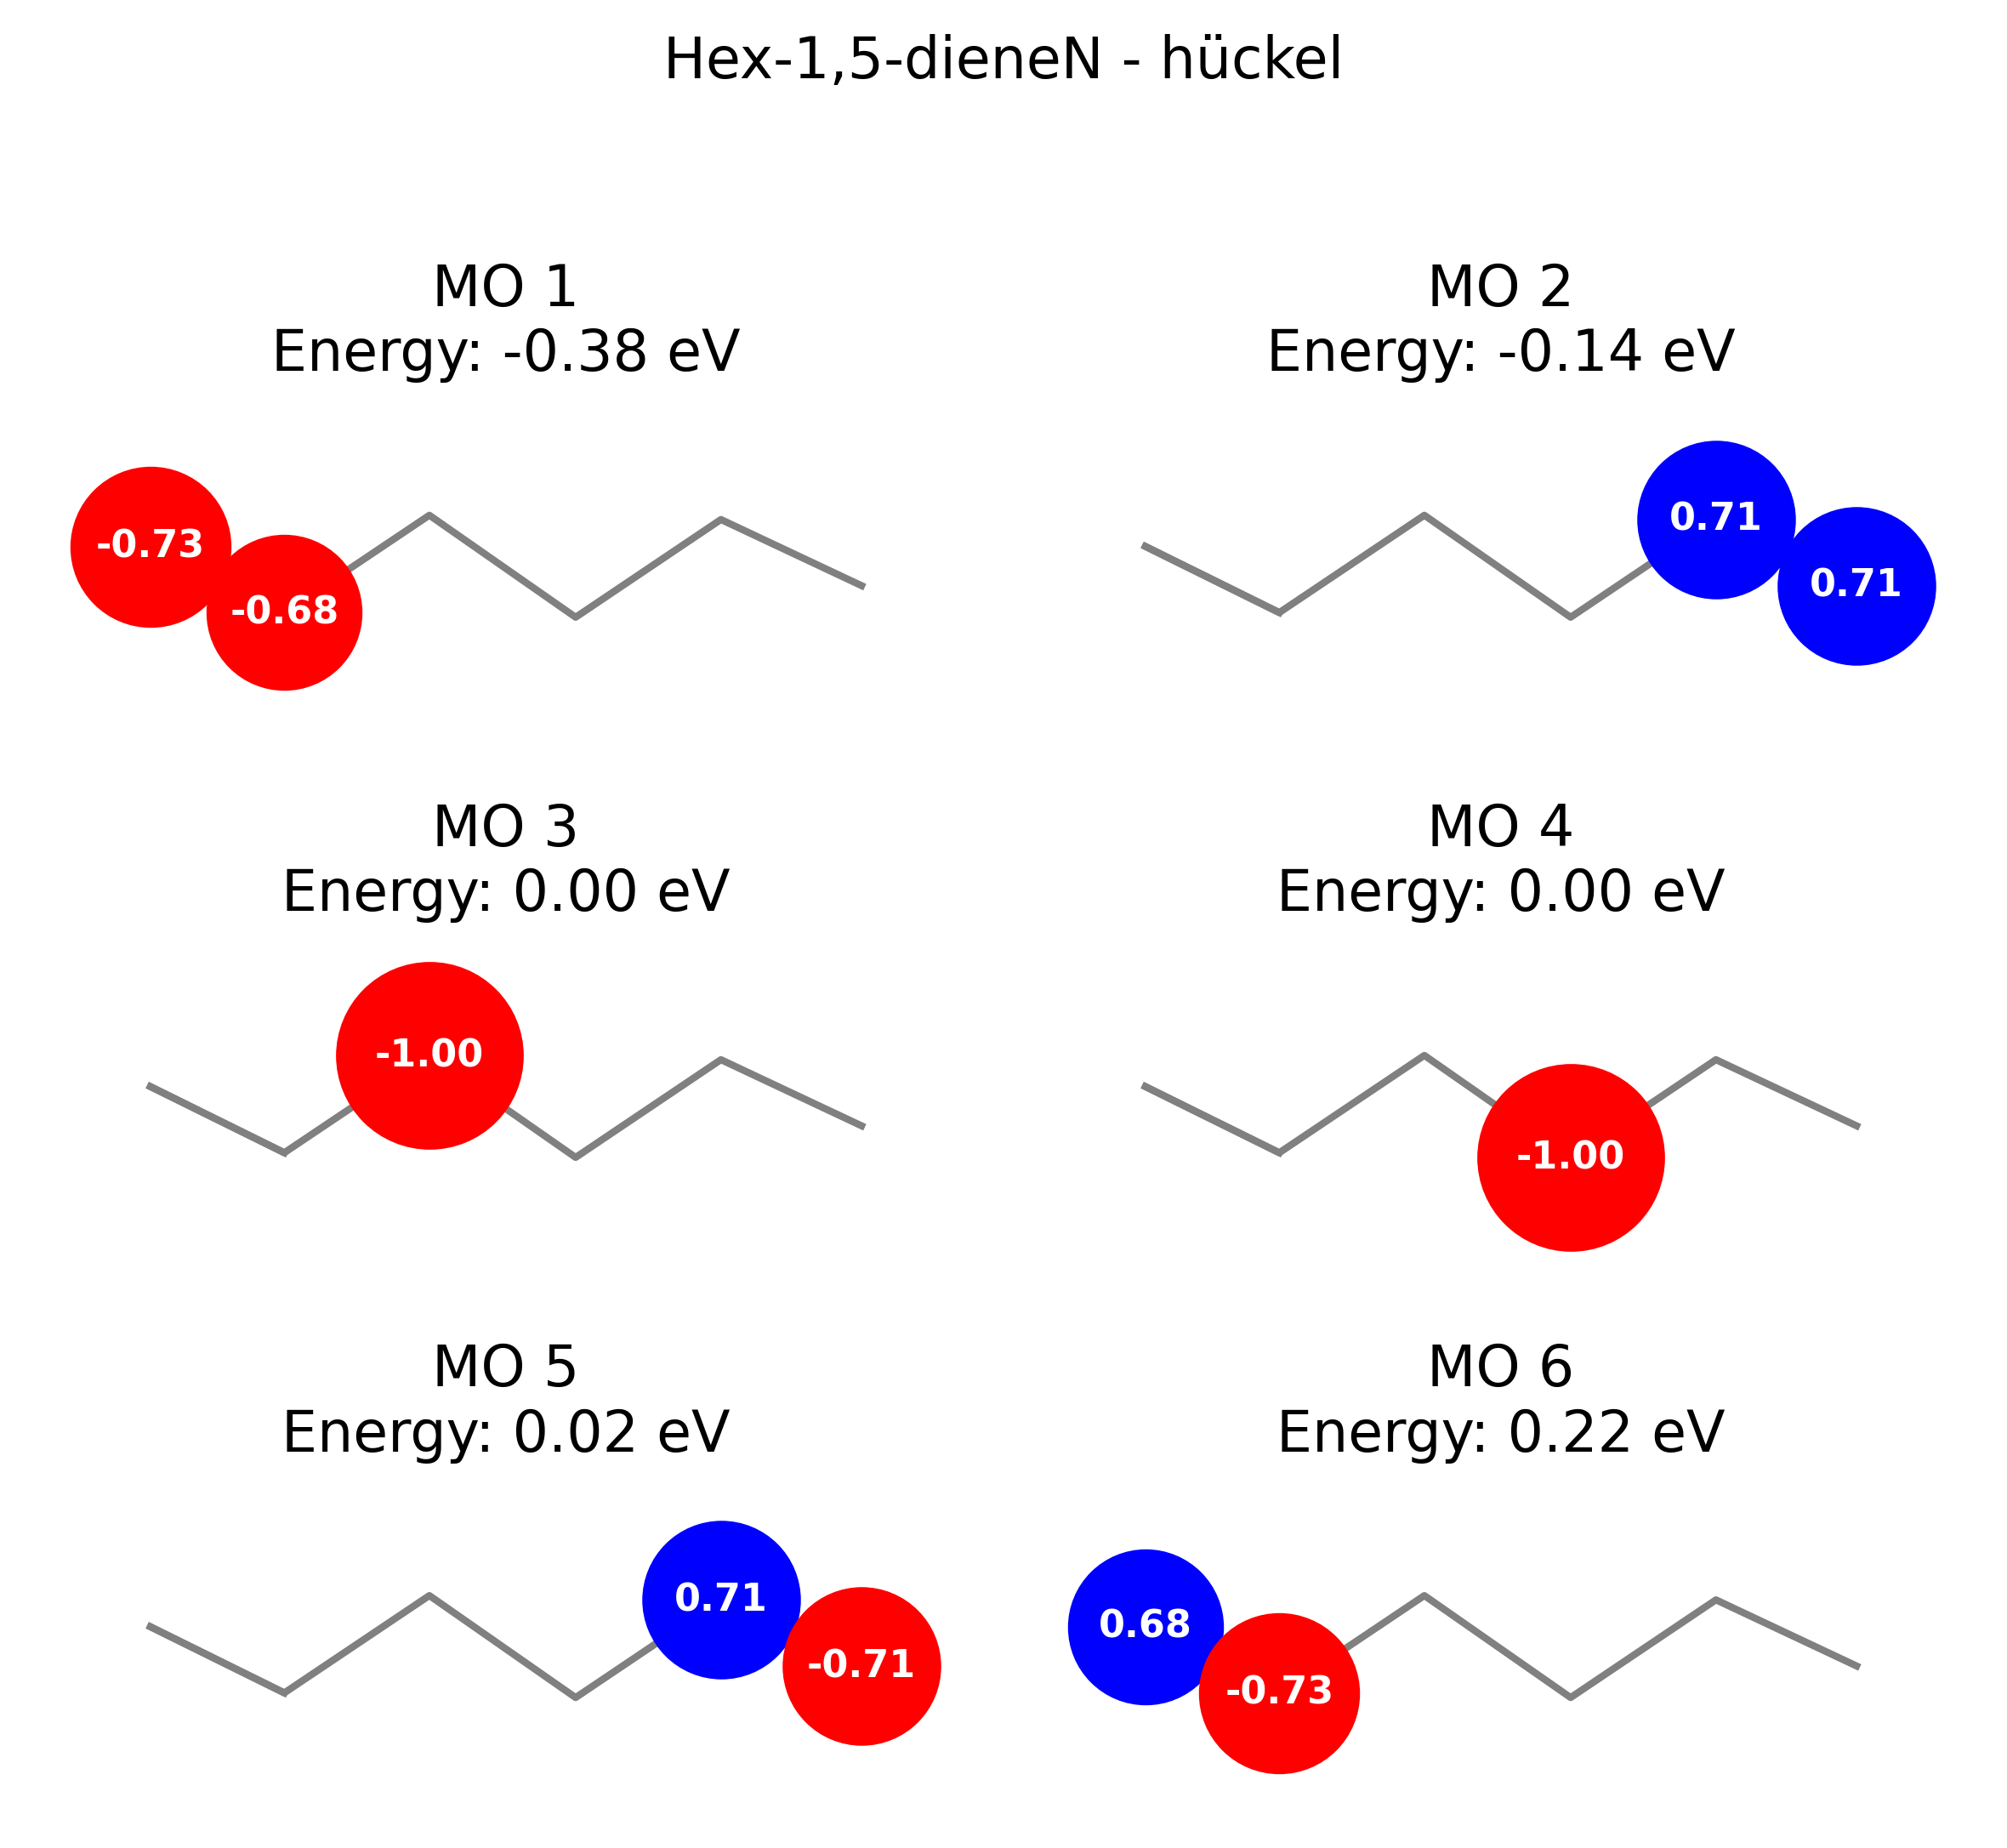

In [11]:
HexdieneN_huckel.solve_huckel_matrix()
eigval = HexdieneN_huckel.eigenvalues
eigvec = HexdieneN_huckel.eigenvectors.round(6)

print(eigval)
print(eigvec)
pts.plot_MOs(eigval, eigvec, coordinates, extra_bounds, 'Hex-1,5-dieneN', 'hückel', fig_size = (6,6))

[[1.06651844 0.99778477 0.         0.         0.         0.        ]
 [0.99778477 0.93348076 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.00000062 1.00000062]
 [0.         0.         0.         0.         1.00000062 1.00000062]]


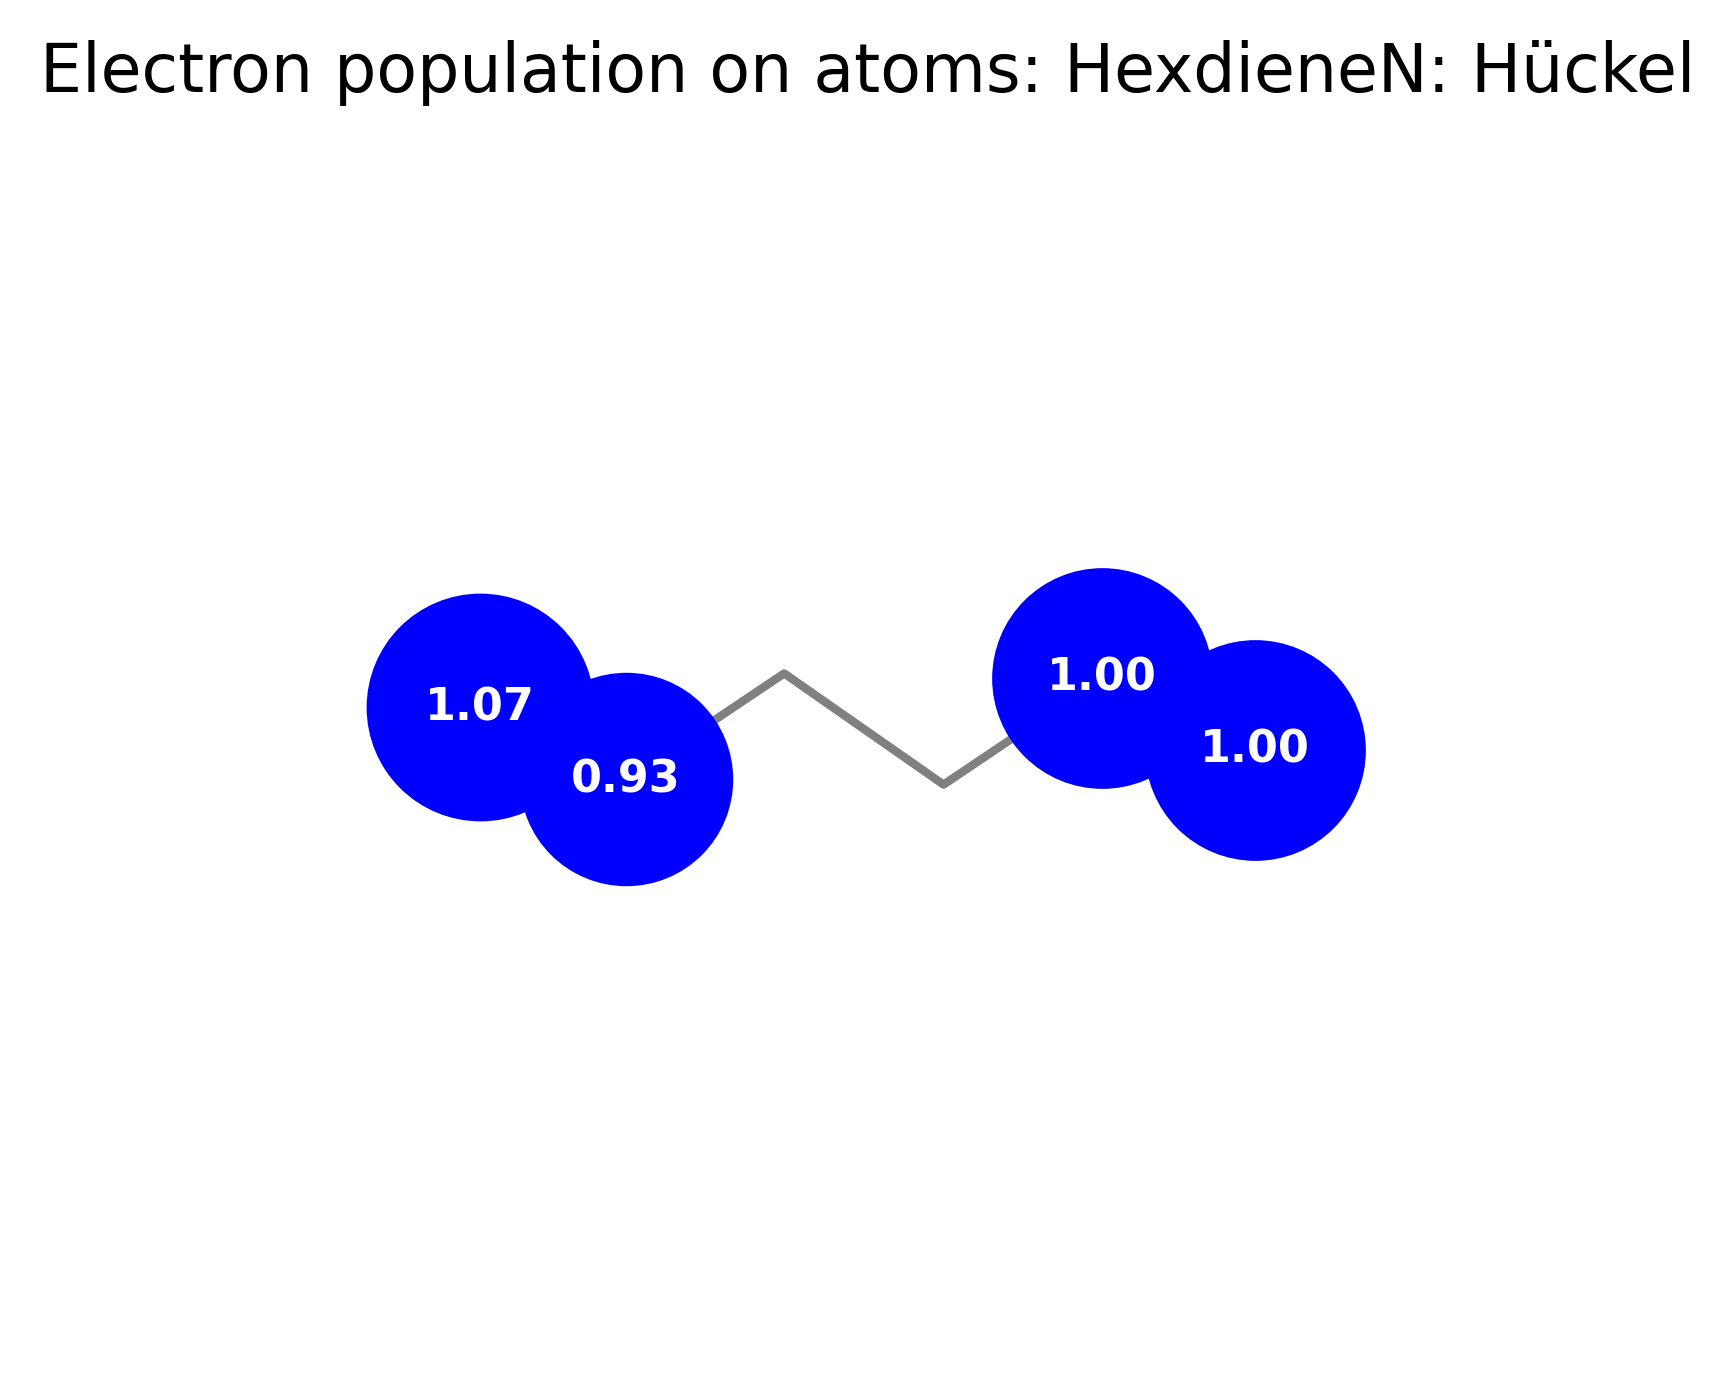

In [18]:
D_huckel = pts.making_D(eigvec, 4)
print(D_huckel)
pts.plotting_of_D_atoms(6, coordinates, extra_bounds, D_huckel, 'HexdieneN', 'Hückel')

In [13]:
IP = {
    'H 1s': 13.6,
    'C 2s': 21.4, 'C 2p': 11.4,
    'N 2s': 25.58, 'N 2p': 13.9,
    'O 2s': 32.38, 'O 2p': 15.85,
    'F 2s': 40.20, 'F 2p': 18.66
}
K = 1.75

In [14]:
print(HextrieneN_molecule.ao_labels())
indices_valence_orbitals = pts.taking_indices(HextrieneN_molecule, IP.keys())
print(indices_valence_orbitals)
valence_orbitals = [label for index,label in enumerate(HextrieneN_molecule.ao_labels()) if index in indices_valence_orbitals]
print(valence_orbitals)
alg_valence_orbitals = [label[2::].lstrip()[:4] for label in valence_orbitals]
pz_indices_full = [i for i, label in enumerate(valence_orbitals) for a in ['C 2px', 'N 2px'] if a in label]
print(alg_valence_orbitals)
print(pz_indices_full)

n = len(indices_valence_orbitals)
print(n)
EHT_full = np.zeros((n,n))

['0 N 1s    ', '0 N 2s    ', '0 N 2px   ', '0 N 2py   ', '0 N 2pz   ', '1 C 1s    ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 1s    ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 1s    ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 C 1s    ', '4 C 2s    ', '4 C 2px   ', '4 C 2py   ', '4 C 2pz   ', '5 C 1s    ', '5 C 2s    ', '5 C 2px   ', '5 C 2py   ', '5 C 2pz   ', '6 H 1s    ', '7 H 1s    ', '8 H 1s    ', '9 H 1s    ', '10 H 1s    ', '11 H 1s    ', '12 H 1s    ', '13 H 1s    ', '14 H 1s    ']
[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
['0 N 2s    ', '0 N 2px   ', '0 N 2py   ', '0 N 2pz   ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 C 2s    ', '4 C 2px   ', '4 C 2py   ', '4 C 2pz   ', '5 C 2s    ', '5 C 2px   ', '5 C 2py   ', 

In [15]:
for i, label in enumerate(alg_valence_orbitals):
    alpha = IP[label] 
    EHT_full[i, i] = -alpha 
S_full = hf.get_ovlp()[indices_valence_orbitals][:, indices_valence_orbitals]
for i in range(n):
    for j in range(n):
        if i != j:
            EHT_full[i, j] = EHT_full[j, i] = K*S_full[i,j]*(EHT_full[i,i]+EHT_full[j,j])/2
A = fractional_matrix_power(S_full, -0.5)
A = np.asarray(A)
H_p = A @ EHT_full @ A 
eigenvalues_full, C_p = np.linalg.eigh(H_p)

print(eigenvalues_full)
C = A @ C_p

for i in range(n):
    C[:,i] = (np.dot(C[:,i], C[:,i]))**(-1/2) * C[:,i]


C_0 = C[pz_indices_full,:].round(6)
print(C_0[:,[7,9,12,16,17,18,21,23]])

[-29.36766807 -27.57407309 -25.19804493 -22.12469773 -19.67742123
 -19.43610305 -16.54487609 -16.07924502 -15.79678558 -14.971816
 -14.88670297 -14.61452466 -14.33697207 -14.03142522 -13.62148664
 -13.13210651 -12.77719694  -9.29882569  -8.55243859  -0.08768963
   0.54312037   1.89829407   2.0680099    4.69441808   5.46965846
   6.44503685   7.93412061   9.83994542  12.75951062  17.55946475
  26.80457868  32.25730957  36.51251563]
[[-0.168162  0.57936   0.71355  -0.010178  0.50901  -0.045063 -0.023247
  -0.025922]
 [-0.186251  0.341417  0.240501 -0.001745 -0.830083  0.081551  0.066957
   0.087268]
 [-0.469508  0.258441 -0.357381  0.033139  0.043571 -0.018881 -0.462414
  -0.512865]
 [-0.452573 -0.38922   0.196916 -0.176152  0.01389  -0.017349 -0.463692
   0.511212]
 [-0.142463 -0.170335  0.1111    0.618433  0.057122  0.71667   0.068778
  -0.087902]
 [-0.048962 -0.085089  0.070469  0.718325 -0.068449 -0.66972  -0.028446
   0.029749]]


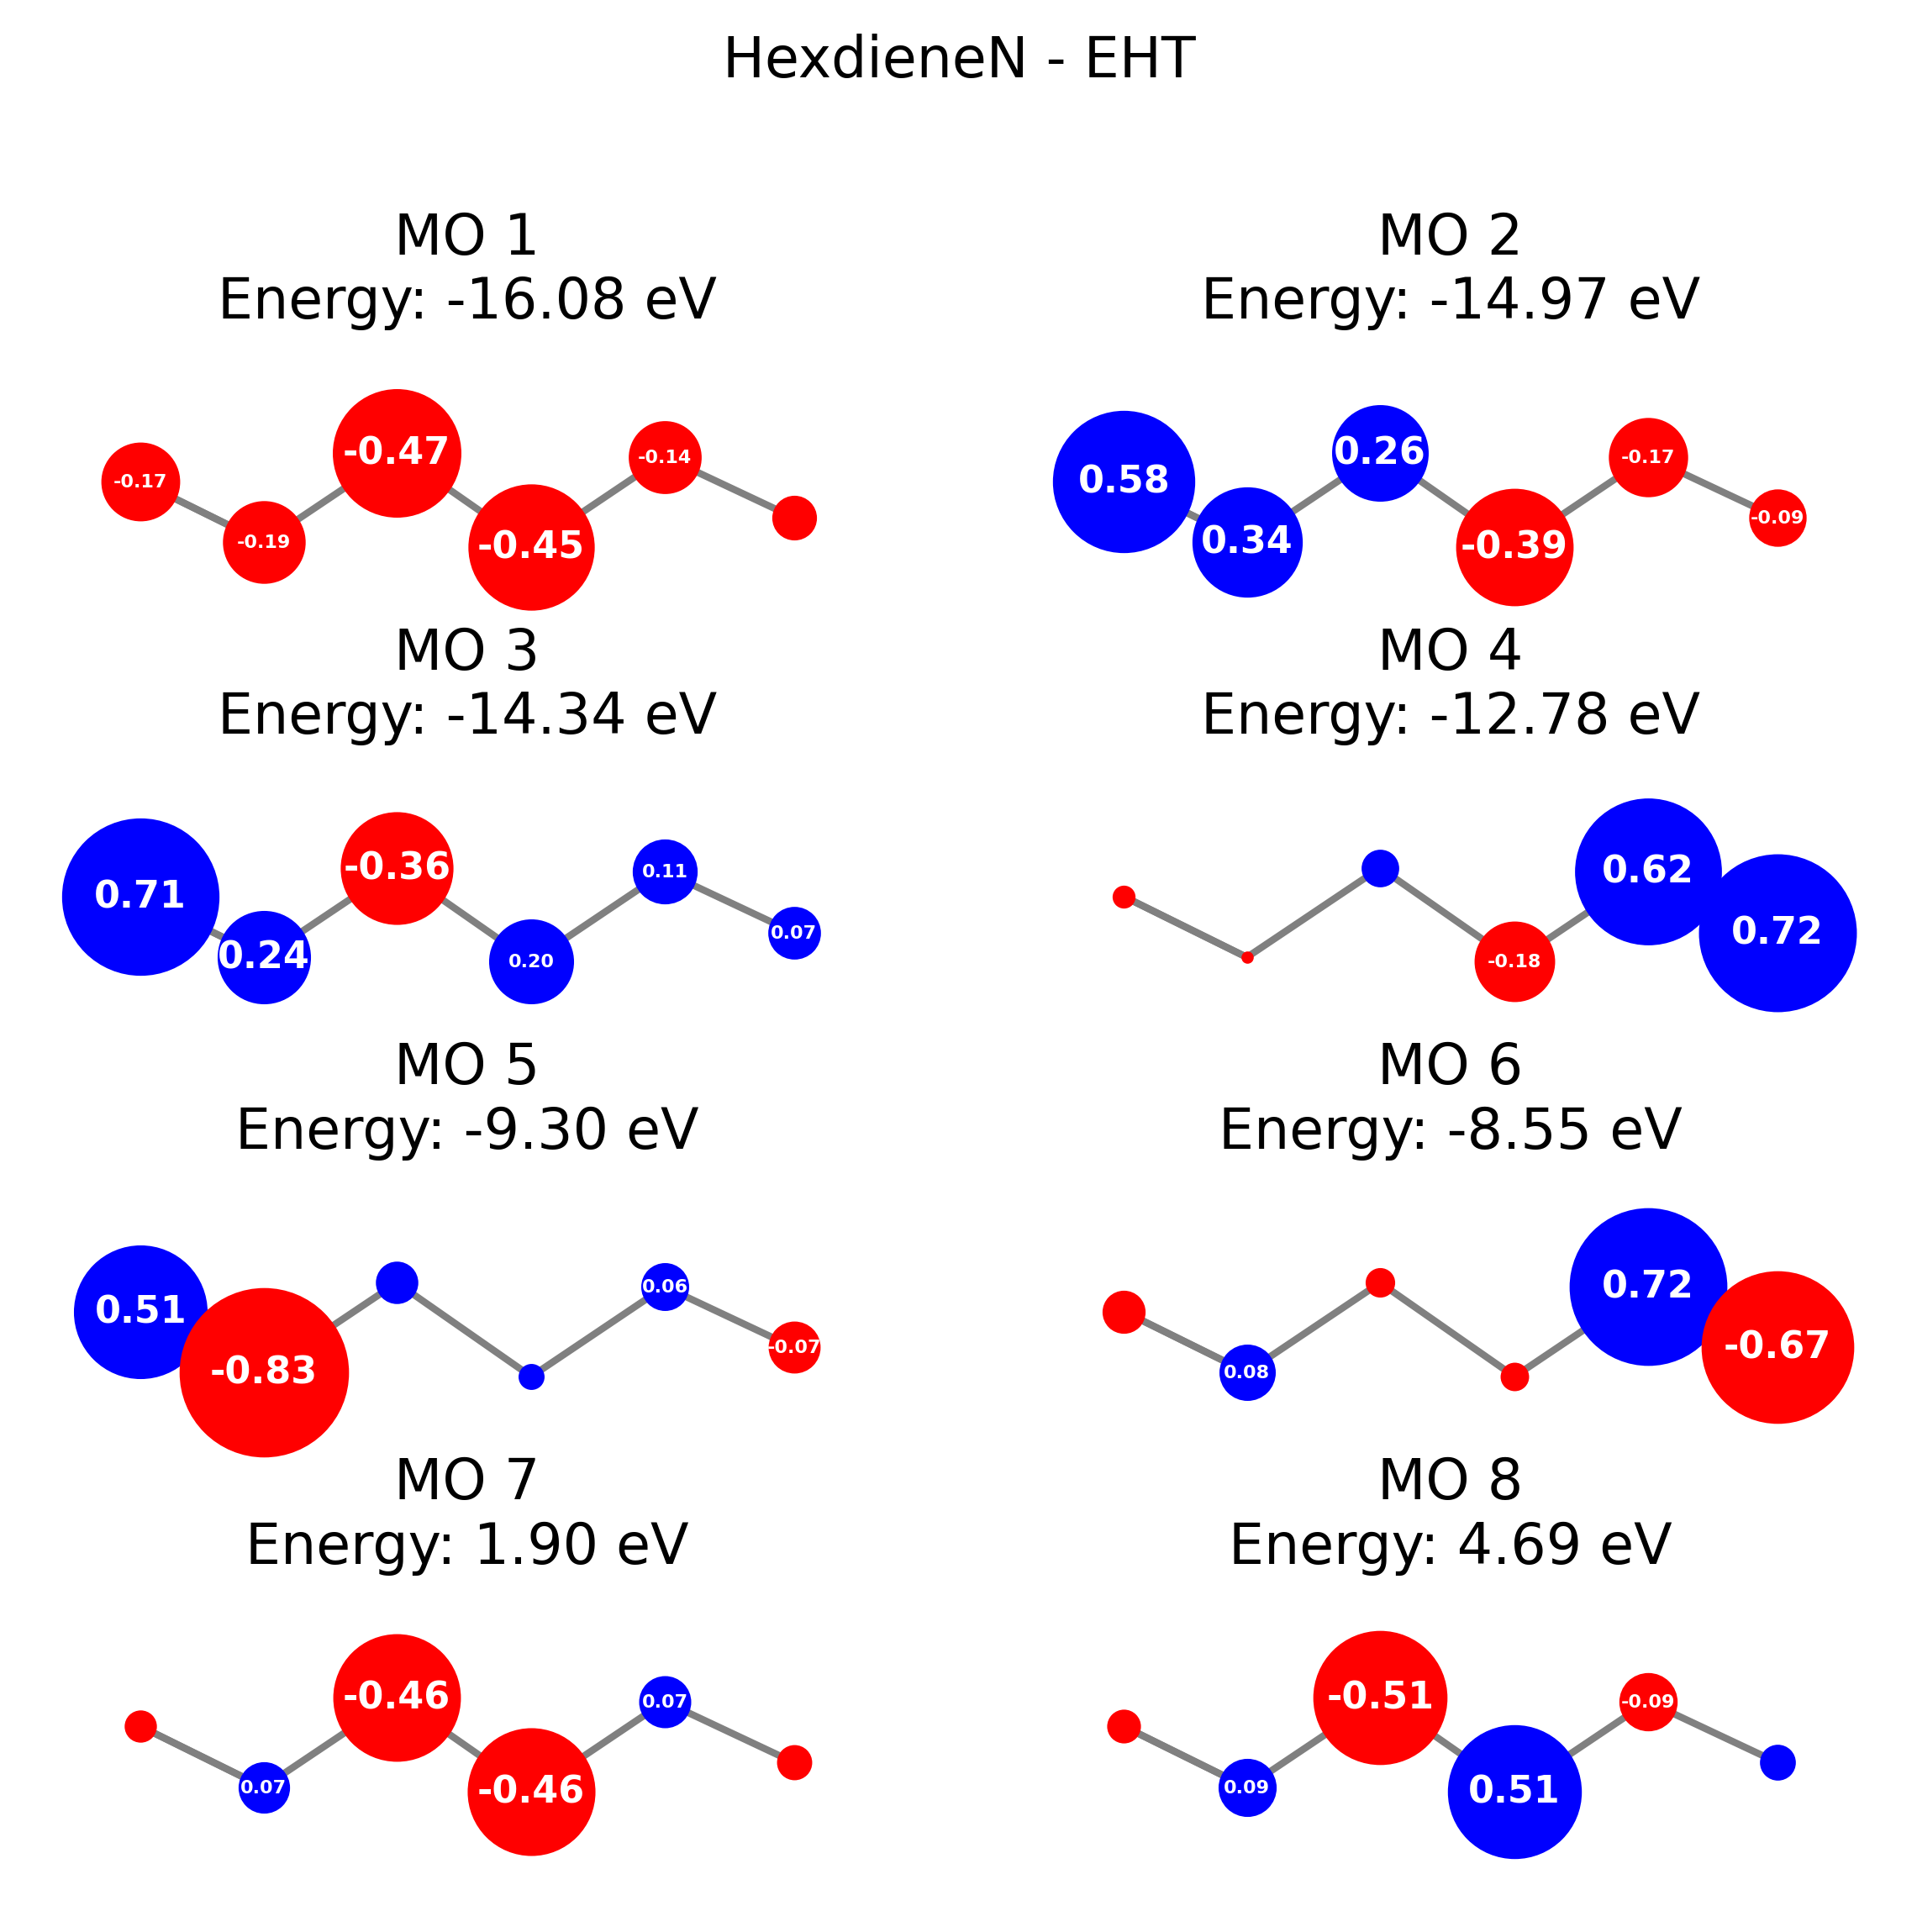

In [19]:
pts.plot_MOs(eigenvalues_full[[7,9,12,16,17,18,21,23]], C_0[:, [7,9,12,16,17,18,21,23]], coordinates, extra_bounds, 'HexdieneN', 'EHT', (6,6))

[[ 1.74638732e+00  8.01501886e-01 -5.33254385e-02 -1.41812630e-02
  -3.49485734e-03  3.81685581e-03]
 [ 8.01501886e-01  4.18197558e-01  1.79348340e-01 -1.85654152e-03
  -1.19617859e-02 -8.47444361e-03]
 [-5.33254385e-02  1.79348340e-01  8.32097770e-01  7.13693999e-02
   7.31038511e-03 -7.64290134e-04]
 [-1.41812630e-02 -1.85654152e-03  7.13693999e-02  8.52239934e-01
   8.74237076e-02 -1.14761384e-01]
 [-3.49485734e-03 -1.19617859e-02  7.31038511e-03  8.74237076e-02
   8.88224608e-01  9.47067798e-01]
 [ 3.81685581e-03 -8.47444361e-03 -7.64290134e-04 -1.14761384e-01
   9.47067798e-01  1.06118820e+00]]
5.7983353957879995


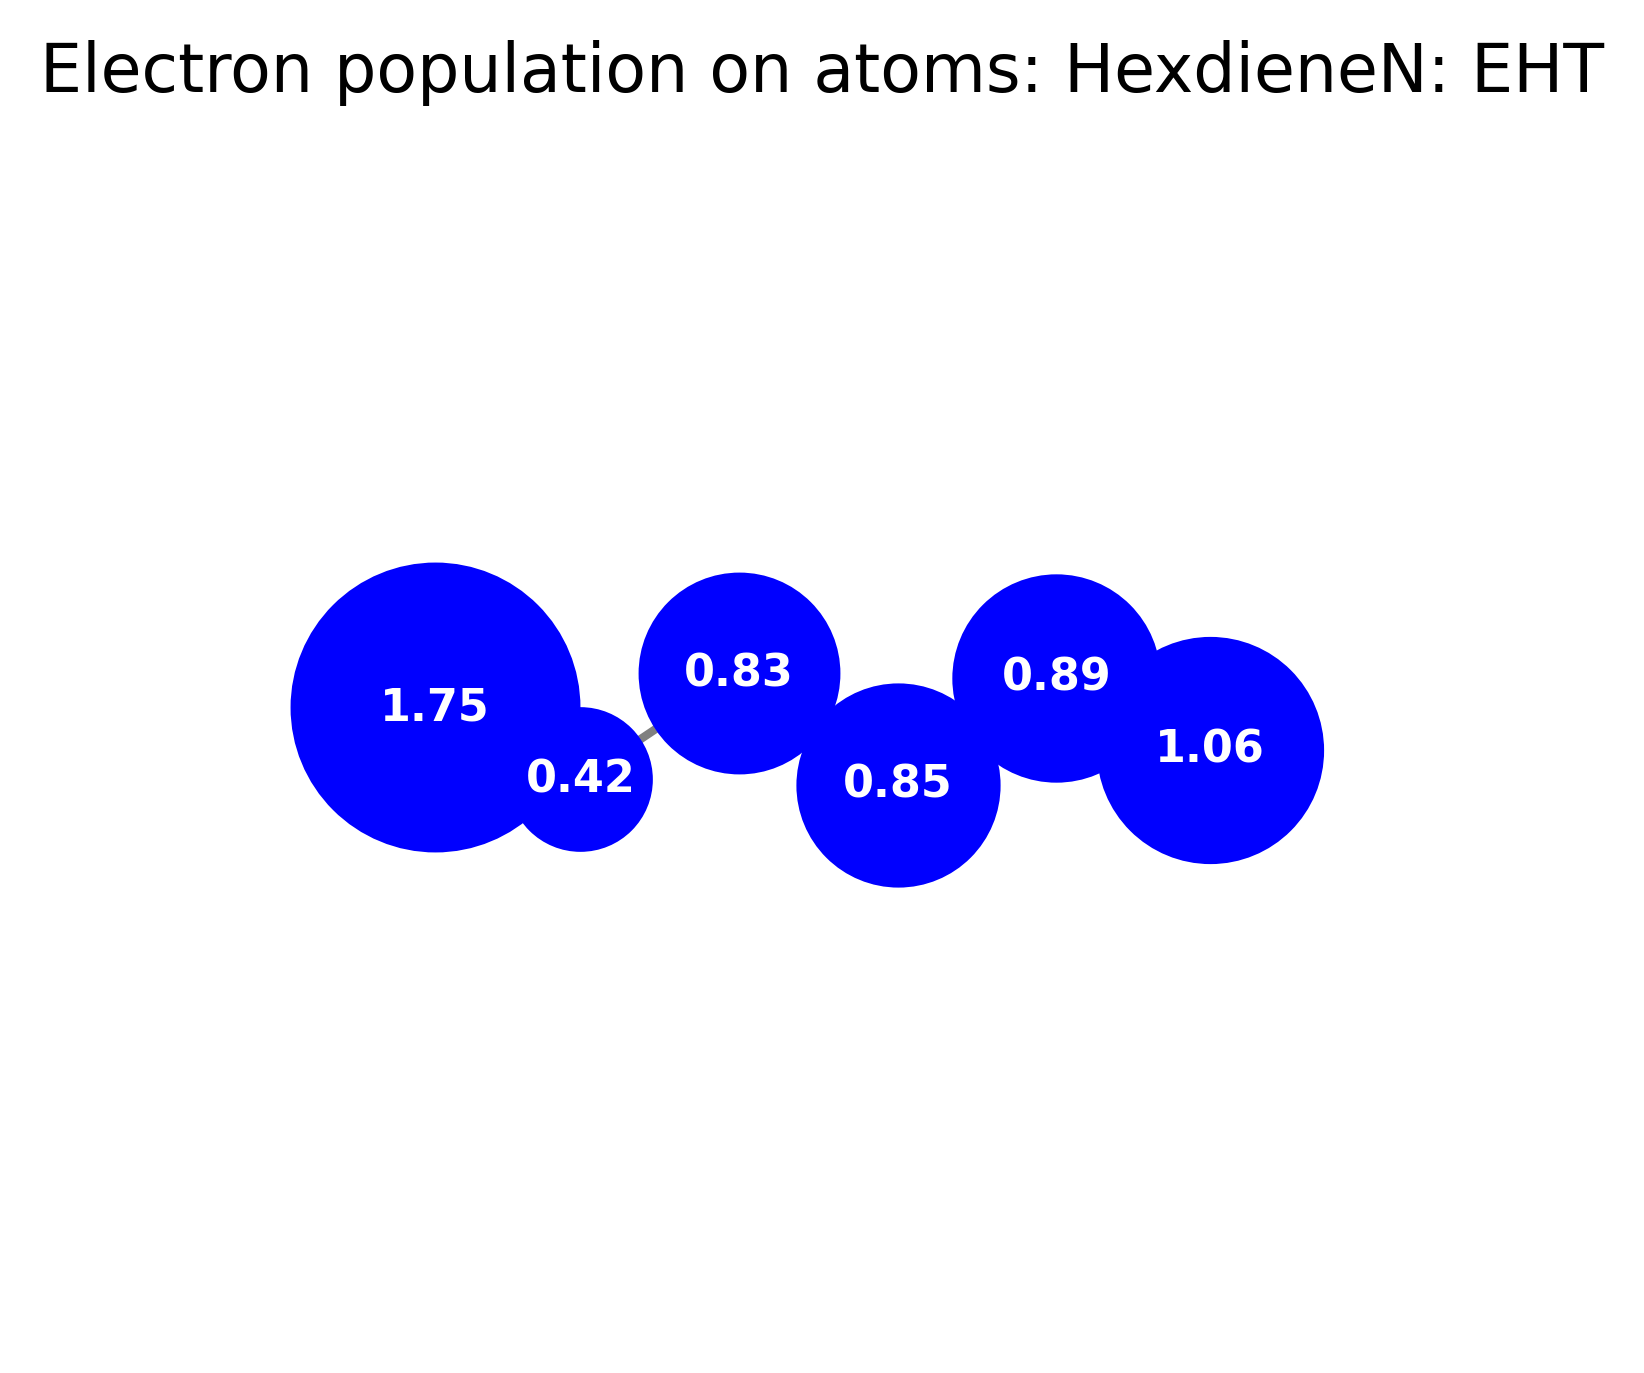

In [20]:
D_huckel = pts.making_D(C_0[:, [7,9,12,16,17,18,21,23]], 8)
print(D_huckel)
print(sum(np.diag(D_huckel)))
pts.plotting_of_D_atoms(6, coordinates, extra_bounds, D_huckel, 'HexdieneN', 'EHT')